In [1]:
import numpy as np
from neurodsp.sim import sim_oscillation, sim_combined
from neurodsp.plts import plot_time_series
from bycycle import Bycycle

### Enforcing Periods
This notebook shows how noise can influence cycle periods, which in turn will cause greater error in affine transforms, from motif to cycle. Each asine cycle here is simulated at 50 samples (20 hz at 1000 fs). However, the cycles are defined from 47 to 53 samples, using bycycle. Given a large enough number of cycles, the average motif waveform will approach ground truth, but the affine transforms will produce artifacts.

A possible solution (to-do) is to add an option to bycycle that attempts to define cyclepoints in a way that maximizes the number of cycles at a center frequency (50 samples here).

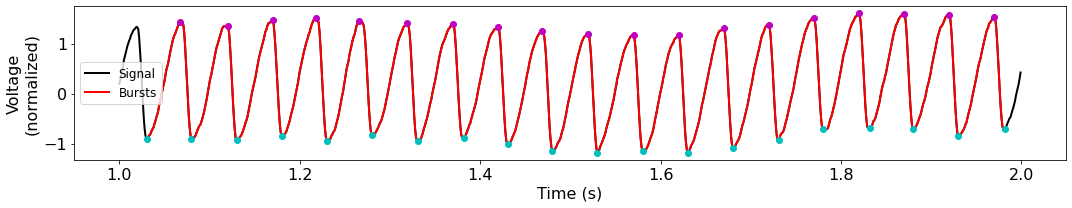

In [2]:
components = {
    'sim_oscillation': {'freq': 20, 'cycle': 'asine', 'rdsym': .8},
    'sim_powerlaw': {'exponent': -2}
}

fs = 1000

sig = sim_combined(10, fs, components, (1, .5))

times = np.arange(0, len(sig)/fs, 1/fs)

bm = Bycycle(find_extrema_kwargs={'filter_kwargs': {'n_seconds': 1}})
bm.fit(sig, fs, (10, 30))
bm.plot(plot_only_results=True, xlim=(1, 2))

In [3]:
bm.df_features['period'].values

array([50, 50, 51, 49, 50, 51, 49, 51, 51, 48, 50, 51, 50, 51, 48, 50, 50,
       51, 49, 51, 49, 50, 50, 50, 50, 51, 51, 49, 49, 50, 51, 49, 50, 51,
       49, 52, 48, 50, 52, 49, 49, 50, 50, 50, 50, 53, 50, 49, 48, 50, 50,
       50, 51, 50, 50, 49, 50, 51, 49, 50, 50, 51, 50, 50, 49, 50, 50, 51,
       49, 51, 50, 50, 49, 51, 49, 50, 50, 50, 51, 49, 50, 50, 50, 50, 50,
       51, 49, 51, 49, 50, 52, 49, 49, 50, 50, 50, 50, 50, 51, 51, 49, 49,
       51, 49, 52, 50, 49, 49, 51, 49, 51, 49, 51, 49, 50, 51, 49, 51, 50,
       50, 49, 50, 52, 49, 49, 51, 49, 50, 50, 51, 49, 50, 50, 51, 49, 51,
       49, 50, 51, 49, 50, 50, 50, 51, 50, 52, 48, 49, 51, 51, 51, 47, 50,
       50, 50, 52, 49, 51, 48, 52, 49, 49, 50, 50, 50, 50, 51, 49, 52, 48,
       50, 50, 50, 51, 49, 50, 52, 49, 50, 49, 50, 52, 48, 52, 48, 50, 51,
       49, 50, 52, 49, 49, 51, 49, 52, 48, 52, 48, 50])

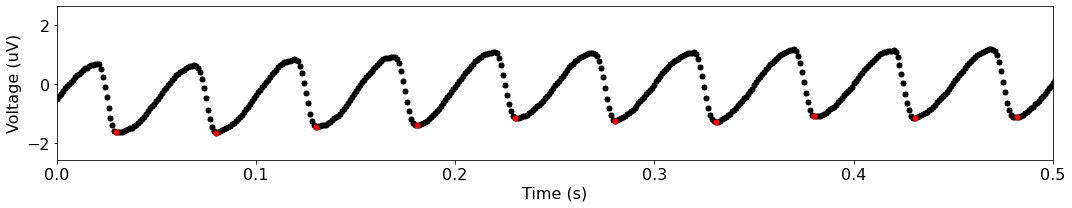

In [5]:
lts = bm.df_features.sample_last_trough.values

plot_time_series(
    [times, times[lts]],
    [sig, sig[lts]],
    xlim=(0, .5), ls='', marker='.', colors=['k', 'r'], ms=10
)